In [1]:
import os, sys, h5py
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc, precision_recall_curve, accuracy_score, roc_auc_score

# plotting tools
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

np.random.seed(33) # for reproducibility

# get fmaps

In [2]:
import os
import numpy as np
from six.moves import cPickle
from tensorflow import keras
from tensorflow import keras
import helper
from tfomics import utils, metrics

Using TensorFlow backend.


In [10]:
num_trials = 10
model_names = ['cnn-deep']# deep', 'cnn-25', 'cnn-4'] #
activations = ['exponential', 'relu']

results_path = utils.make_directory('../results', 'synthetic')
params_path = utils.make_directory(results_path, 'model_params')

In [13]:
# load data
data_path = '../data/synthetic_dataset.h5'
data = helper.load_dataset(data_path)
x_train, y_train, x_valid, y_valid, x_test, y_test = data
X = x_test[:500]

In [28]:
results = {}
for layer in [3, 7, 12, 17, 23]:
    results[layer] = {}
    for model_name in model_names:
        for activation in activations:
        
            results[layer][model_name+'_'+activation] = []
            keras.backend.clear_session()

            # load model
            model, name = helper.load_model(model_name, 
                                            activation=activation, 
                                            dropout=True, 
                                            l2=1e-6, 
                                            bn=True,
                                            input_shape=200)
            base_name = name+'_'+activation
            name = base_name+'_'+str(trial)
            print('model: ' + name)

            weights_path = os.path.join(params_path, name+'.hdf5')
            model.load_weights(weights_path)            

            intermediate = keras.Model(inputs=model.inputs, outputs=model.layers[layer].output)
            results[layer][model_name+'_'+activation] = intermediate.predict(X)


model: cnn-deep_do_l2_bn_exponential_9
model: cnn-deep_do_l2_bn_relu_9
model: cnn-deep_do_l2_bn_exponential_9
model: cnn-deep_do_l2_bn_relu_9
model: cnn-deep_do_l2_bn_exponential_9
model: cnn-deep_do_l2_bn_relu_9
model: cnn-deep_do_l2_bn_exponential_9
model: cnn-deep_do_l2_bn_relu_9
model: cnn-deep_do_l2_bn_exponential_9


InternalError: 2 root error(s) found.
  (0) Internal: Blas GEMM launch failed : a.shape=(32, 384), b.shape=(384, 512), m=32, n=512, k=384
	 [[{{node dense/MatMul}}]]
  (1) Internal: Blas GEMM launch failed : a.shape=(32, 384), b.shape=(384, 512), m=32, n=512, k=384
	 [[{{node dense/MatMul}}]]
	 [[activation_4/Relu/_167]]
0 successful operations.
0 derived errors ignored.

In [78]:
for layer in results.keys():
    print(layer)
    s1 = results[layer]['cnn-deep_relu'].reshape([-1,])
    s2 = results[layer]['cnn-deep_exponential'].reshape([-1,])
    print("%.3f\t%.3f\t%.3f"%(np.mean(s1), np.std(s1), np.max(s1)))
    print("%.3f\t%.3f\t%.3f"%(np.mean(s2), np.std(s2), np.max(s2)))


3
0.122	0.284	2.796
2.493	6.463	383.888
7
0.010	0.065	2.050
0.057	0.243	7.765
12
0.063	0.275	6.546
0.156	0.353	7.562
17
0.173	0.476	7.708
0.199	0.457	6.813
23


KeyError: 'cnn-deep_relu'

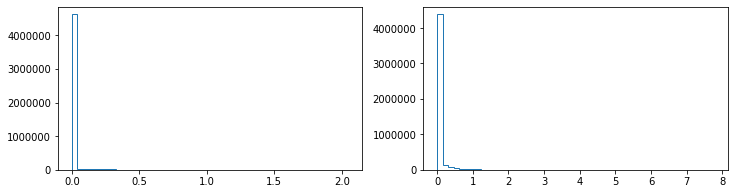

In [73]:
layer = 7
s1 = results[layer]['cnn-deep_relu'].reshape([-1,])
s2 = results[layer]['cnn-deep_exponential'].reshape([-1,])

bins = 50
fig = plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.hist(s1, bins, histtype='step');
bins = 50
plt.subplot(1,2,2)
plt.hist(s2, bins, histtype='step');

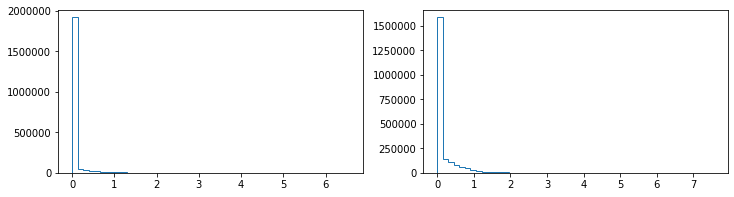

In [75]:
layer = 12
s1 = results[layer]['cnn-deep_relu'].reshape([-1,])
s2 = results[layer]['cnn-deep_exponential'].reshape([-1,])

bins = 50
fig = plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.hist(s1, bins, histtype='step');
bins = 50
plt.subplot(1,2,2)
plt.hist(s2, bins, histtype='step');

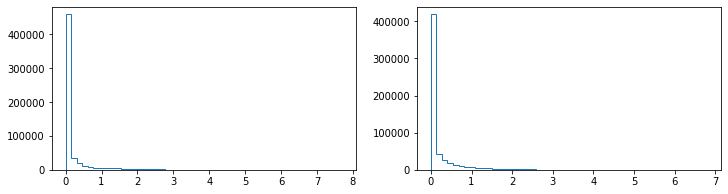

In [76]:
layer = 17
s1 = results[layer]['cnn-deep_relu'].reshape([-1,])
s2 = results[layer]['cnn-deep_exponential'].reshape([-1,])

bins = 50
fig = plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.hist(s1, bins, histtype='step');
bins = 50
plt.subplot(1,2,2)
plt.hist(s2, bins, histtype='step');

In [22]:

for i in range(num_trials):
    score2 = np.max(results['task2-cnn-deep_exponential'][i], axis=2)
    roc_score2, pr_score2 = interpretability_performance(X, score2, X_model, buffer=21)
    print('trial '+str(i))
    print(np.mean(roc_score2), np.std(pr_score2))
    print(np.mean(pr_score2), np.std(pr_score2))    

trial 0
0.8430245381858285 0.2542347995184086
0.784454094292804 0.2542347995184086
trial 1
0.8406396470912599 0.25601138904378096
0.7776799007444168 0.25601138904378096
trial 2
0.8441618417424869 0.25271497076502236
0.7855727874276262 0.25271497076502236
trial 3
0.8424662255307416 0.2550265144479992
0.7801226909291424 0.2550265144479992
trial 4
0.8459849738075544 0.25385284346571074
0.7839536807278742 0.25385284346571074
trial 5
0.7765887786049076 0.2709710594555
0.7262396116428375 0.2709710594555
trial 6
0.8495312930796802 0.25212428683880794
0.7886517783291976 0.25212428683880794
trial 7
0.8349048800661705 0.25781003006259173
0.7734167355941548 0.25781003006259173
trial 8
0.8404776674937965 0.2578378218978964
0.7758891645988419 0.2578378218978964
trial 9
0.8352839812517232 0.2567387328761628
0.7730224703611799 0.2567387328761628


In [23]:
best_index = 6
fmap_deep_exp = results['task2-cnn-deep_exponential'][best_index]
score2 = np.max(fmap_deep_exp, axis=2)
roc_score_deep_exp, pr_score_deep_exp = interpretability_performance(X, score2, X_model, buffer=21)
print(np.mean(roc_score_deep_exp), np.std(roc_score_deep_exp))
print(np.mean(pr_score_deep_exp), np.std(pr_score_deep_exp))    

0.8495312930796802 0.17390863813837437
0.7886517783291976 0.25212428683880794


/home/peter/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  
/home/peter/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log2
  after removing the cwd from sys.path.


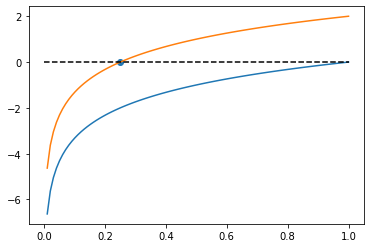

In [24]:
x = np.linspace(0,1,100)
plt.plot(x, np.log2(x))

plt.plot(x, np.log2(4*x))
plt.plot(x, np.zeros(x.shape), '--k')
plt.scatter(0.25,0)

/home/peter/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  
/home/peter/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log2
  after removing the cwd from sys.path.


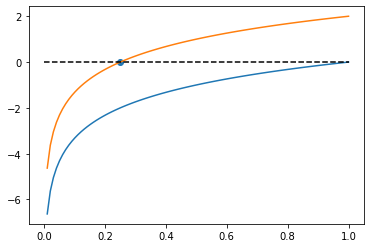

In [25]:
x = np.linspace(0,1,100)
plt.plot(x, np.log2(x))

plt.plot(x, np.log2(4*x))
plt.plot(x, np.zeros(x.shape), '--k')
plt.scatter(0.25,0)

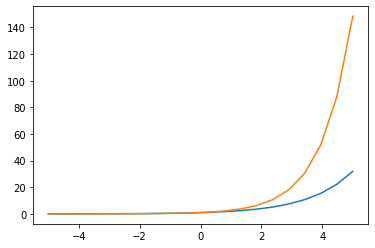

In [26]:
x = np.linspace(-5,5,20)
plt.plot(x, 2**x)
plt.plot(x, np.exp(x))

In [27]:
fmap_deep_relu = results['task2-cnn-deep_relu'][6]
score2 = np.max(fmap_deep_relu, axis=2)
roc_score_deep_relu, pr_score_deep_relu = interpretability_performance(X, score2, X_model, buffer=21)
print(np.mean(roc_score_deep_relu), np.std(roc_score_deep_relu))
print(np.mean(pr_score_deep_relu), np.std(pr_score_deep_relu)) 

0.6619313482216708 0.2714032451469868
0.6075157548544645 0.28753517725739963


# log scans

In [47]:
keras.backend.clear_session()

import task2_cnn_deep_log

# load model
model = task2_cnn_deep_log.model('log_relu', True)

name = 'cnn-deep_log_relu_l2_0'
weights_path = os.path.join('../results/synthetic_code_log/model_params', name+'.hdf5')
model.load_weights(weights_path)


intermediate = keras.Model(inputs=model.inputs, outputs=model.layers[3].output)
fmap_deep_log = intermediate.predict(X)


[]

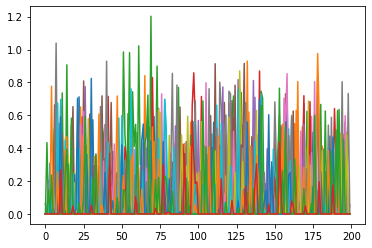

In [51]:

plt.plot(np.maximum(fmap_deep_log[index], 0));
ax.set_xticklabels([])

# Plot scan comparison

In [ ]:
from tfomics import utils
plot_path = utils.make_directory(results_path, 'pwm_comparison')

([], <a list of 0 Text yticklabel objects>)

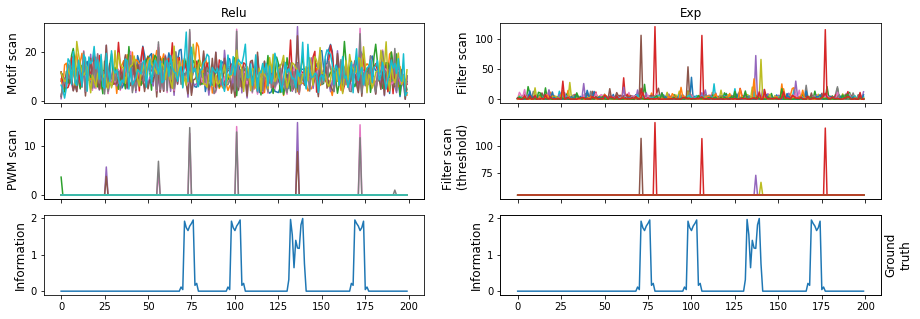

In [59]:
index = 1
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(3,2,1)
ax.plot(np.maximum(fmap_all[index].T, 0));
ax.set_xticklabels([])
plt.title('Relu', fontsize=12)
plt.ylabel('Motif scan', fontsize=12)
#plt.figure()
#plt.plot(fmap_deep_relu[index]);

ax = plt.subplot(3,2,2)

threshold = np.exp(-10)
ax.plot(np.maximum(fmap_deep_exp[index], threshold));
ax.set_xticklabels([])
plt.title('Exp', fontsize=12)
plt.ylabel('Filter scan', fontsize=12)


ax = plt.subplot(3,2,3)
ax.plot(np.maximum(fmap_pwm[index].T, 0));
plt.ylabel('PWM scan', fontsize=12)
ax.set_xticklabels([])
ax2 = ax.twinx()
#plt.ylabel('PWM', fontsize=12)
plt.yticks([])

ax = plt.subplot(3,2,4)
threshold = np.exp(4)
ax.plot(np.maximum(fmap_deep_exp[index], threshold));
ax.set_xticklabels([])
plt.ylabel('Filter scan\n (threshold)', fontsize=12)
ax2 = ax.twinx()
#plt.ylabel('Exp', fontsize=12)
plt.yticks([])


ax = plt.subplot(3,2,5)
buffer = 1

# calculate information of ground truth
gt_info = np.log2(4) + np.sum(X_model[index]*np.log2(X_model[index]+1e-10),axis=0)

# set label if information is greater than 0
label = np.zeros(gt_info.shape)
label[gt_info > 0.01] = 1

# extend labels
box_filter = np.ones(buffer)
pad_left = int(buffer/2)
pad_right = buffer - pad_left
x_pad = np.concatenate([np.zeros(pad_left), label, np.zeros(pad_right)], axis=0) 
new_label = []
for n in range(L):
    new_label.append(np.sum(x_pad[range(n,n+buffer)] * box_filter))            
new_label = np.array(new_label)
new_label[new_label > 0.01] = 1
plt.ylabel('Information', fontsize=12)

ax.plot(gt_info);

ax = plt.subplot(3,2,6)
buffer = 1

# calculate information of ground truth
gt_info = np.log2(4) + np.sum(X_model[index]*np.log2(X_model[index]+1e-10),axis=0)

# set label if information is greater than 0
label = np.zeros(gt_info.shape)
label[gt_info > 0.01] = 1

# extend labels
box_filter = np.ones(buffer)
pad_left = int(buffer/2)
pad_right = buffer - pad_left
x_pad = np.concatenate([np.zeros(pad_left), label, np.zeros(pad_right)], axis=0) 
new_label = []
for n in range(L):
    new_label.append(np.sum(x_pad[range(n,n+buffer)] * box_filter))            
new_label = np.array(new_label)
new_label[new_label > 0.01] = 1
plt.ylabel('Information', fontsize=12)

ax.plot(gt_info);
ax2 = ax.twinx()
plt.ylabel('Ground\ntruth', fontsize=12)
plt.yticks([])


In [62]:
plot_path = utils.make_directory(results_path, 'pwm_scan')

for index in range(50):

    fig = plt.figure(figsize=(15,5))

    ax = plt.subplot(3,2,1)
    ax.plot(np.maximum(fmap_all[index].T, 0));
    ax.set_xticklabels([])
    plt.title('Relu', fontsize=12)
    plt.ylabel('Motif scan', fontsize=12)
    #plt.figure()
    #plt.plot(fmap_deep_relu[index]);

    ax = plt.subplot(3,2,2)

    threshold = np.exp(-10)
    ax.plot(np.maximum(fmap_deep_exp[index], threshold));
    ax.set_xticklabels([])
    plt.title('Exp', fontsize=12)
    plt.ylabel('Filter scan', fontsize=12)


    ax = plt.subplot(3,2,3)
    ax.plot(np.maximum(fmap_pwm[index].T, 0));
    plt.ylabel('PWM scan', fontsize=12)
    ax.set_xticklabels([])
    ax2 = ax.twinx()
    #plt.ylabel('PWM', fontsize=12)
    plt.yticks([])

    ax = plt.subplot(3,2,4)
    threshold = np.exp(4)
    ax.plot(np.maximum(fmap_deep_exp[index], threshold));
    ax.set_xticklabels([])
    plt.ylabel('Filter scan\n (threshold)', fontsize=12)
    ax2 = ax.twinx()
    #plt.ylabel('Exp', fontsize=12)
    plt.yticks([])


    ax = plt.subplot(3,2,5)
    buffer = 1

    # calculate information of ground truth
    gt_info = np.log2(4) + np.sum(X_model[index]*np.log2(X_model[index]+1e-10),axis=0)

    # set label if information is greater than 0
    label = np.zeros(gt_info.shape)
    label[gt_info > 0.01] = 1

    # extend labels
    box_filter = np.ones(buffer)
    pad_left = int(buffer/2)
    pad_right = buffer - pad_left
    x_pad = np.concatenate([np.zeros(pad_left), label, np.zeros(pad_right)], axis=0) 
    new_label = []
    for n in range(L):
        new_label.append(np.sum(x_pad[range(n,n+buffer)] * box_filter))            
    new_label = np.array(new_label)
    new_label[new_label > 0.01] = 1
    plt.ylabel('Information', fontsize=12)

    plt.xlabel('Position', fontsize=12)
    ax.plot(gt_info);

    ax = plt.subplot(3,2,6)
    buffer = 1

    # calculate information of ground truth
    gt_info = np.log2(4) + np.sum(X_model[index]*np.log2(X_model[index]+1e-10),axis=0)

    # set label if information is greater than 0
    label = np.zeros(gt_info.shape)
    label[gt_info > 0.01] = 1

    # extend labels
    box_filter = np.ones(buffer)
    pad_left = int(buffer/2)
    pad_right = buffer - pad_left
    x_pad = np.concatenate([np.zeros(pad_left), label, np.zeros(pad_right)], axis=0) 
    new_label = []
    for n in range(L):
        new_label.append(np.sum(x_pad[range(n,n+buffer)] * box_filter))            
    new_label = np.array(new_label)
    new_label[new_label > 0.01] = 1
    plt.ylabel('Information', fontsize=12)

    ax.plot(gt_info);
    ax2 = ax.twinx()
    plt.ylabel('Ground\ntruth', fontsize=12)
    plt.yticks([])
    plt.xlabel('Position', fontsize=12)


    outfile = os.path.join(plot_path, 'pwm_comparison_'+str(index))
    fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')
    plt.close()



making directory: ../results/synthetic_code_log/pwm_scan


# Plot box plot comparison between relu vs exp vs pwm scan (give null baseline for random guessing)

In [385]:
np.log(.25)

-1.3862943611198906

# Plot scatter plot between pwm and exp aupr scores

In [420]:
from scipy import stats
pval = stats.ttest_ind(pr_score_pwm, pr_score_deep_exp).pvalue
pval

0.08258157435814215

In [419]:

pval = stats.ttest_ind(roc_score_pwm, roc_score_deep_exp).pvalue
pval

0.17788455235063427

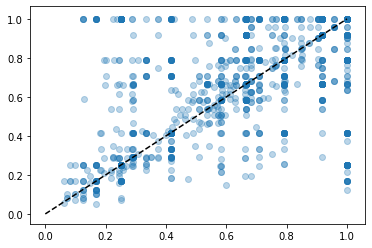

In [256]:
plt.scatter(pr_score, pr_score_deep_exp, alpha=0.3)
plt.plot([0,1], [0,1], '--k')

In [82]:

buffer = 20

pr_score = []
roc_score = []
for j, gs in enumerate(score):

    # calculate information of ground truth
    gt_info = np.log2(4) + np.sum(X_model[j]*np.log2(X_model[j]+1e-10),axis=0)

    
    # set label if information is greater than 0
    label = np.zeros(gt_info.shape)
    label[gt_info > 0.01] = 1
    
    
    # precision recall metric
    precision, recall, thresholds = precision_recall_curve(label, gs)
    pr_score.append(auc(recall, precision))

    # roc curve
    fpr, tpr, thresholds = roc_curve(label, gs)
    roc_score.append(auc(fpr, tpr))

roc_score = np.array(roc_score)
pr_score = np.array(pr_score)


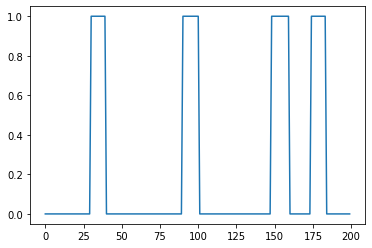

In [99]:
buffer = 10
box_filter = np.ones(buffer)
pad_left = int(buffer/2)
pad_right = buffer - pad_left
x_pad = np.concatenate([np.zeros(pad_left), label, np.zeros(pad_right)], axis=0) 
new_label = []
for n in range(L):
    new_label.append(np.sum(x_pad[range(n,n+buffer)] * box_filter))            
new_label = np.array(new_label)
new_label[new_label > 0.01] = 1


In [125]:
pos_instance = []

index = 0
status = True
while status:
    s = np.where(new_label[index:] == 1)[0]
    if any(list(s)):
        start = index + s[0]
    else:
        status = False
    e = np.where(new_label[index+start:] == 0)[0]
    if any(list(e)):
        end = index + start + e[0]
        pos_instance.append(np.max(gs[start:end]))
        index = end
    else:
        status = False

pos_instance

[31.496697262260696, 32.15846118616899]

In [128]:
neg_instance = []

index = 0
status = True
while status:
    s = np.where(new_label[index:] == 0)[0]
    if any(list(s)):
        start = index + s[0]
    else:
        status = False
    e = np.where(new_label[index+start:] == 1)[0]
    if any(list(e)):
        end = index + start + e[0]
        neg_instance.append(gs[start:end])
        index = end
    else:
        status = False

neg_instance = np.concatenate(neg_instance)


In [129]:
vals = np.concatenate([pos_instance, neg_instance])
labels = np.concatenate([np.ones(len(pos_instance)), np.zeros(len(neg_instance))])
precision, recall, thresholds = precision_recall_curve(label, gs)
pr_score.append(auc(recall, precision))


AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [159]:
vals

array([27.85031172, 36.35755125, 36.81160229, 18.52877196, 15.40147818,
       13.51489093, 15.03457676, 19.52557924, 20.08869056, 12.79917564,
       18.2970297 , 20.12829452, 11.73671733, 16.1033349 , 14.50856435,
       17.34196895, 13.68846744, 17.2600753 , 14.83251987, 19.72408659,
       16.79375261, 15.81543394, 15.84437317, 17.40195612, 16.9785231 ,
       16.71257305, 18.26690838, 18.31655278, 16.2958012 , 17.19120678,
       17.10300707, 20.57788314, 14.93840165, 19.82596748, 19.95099611,
       17.65053688, 14.54071568, 16.77622472, 19.12201751, 19.78749466,
       12.63868359, 13.32254916, 15.88474868, 13.49323665, 18.68481435,
       12.76912647, 23.19266626, 14.59867967, 23.15883419, 14.28420025,
       16.88300098, 19.43002617, 16.5219142 , 20.81056239, 13.66384245,
       29.48542742, 14.50453214, 14.22807419, 19.62354078, 15.0185482 ,
       14.88023815, 11.44052433, 14.6172082 , 18.30874355, 13.16803793,
       21.07488495, 20.39724443, 19.08964569, 21.83650103, 18.86

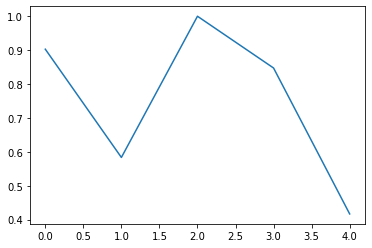

In [168]:
plt.plot(pr_score)